#**Análisis filogenético de los genomas del virus Zika (ZIKV)**

En este guia realizaremos un análisis filogenético a partir de secuencias genómicas del virus Zika (ZIKV). Para este proposito usaremos **Nextstrain**, el cual se compone dos partes fundamentales: **Augur** y **Auspice**. **Augur** es una serie de herramientas bioinformáticas componibles y modulares. Los usamos para crear *pipelines* para diferentes patógenos y diferentes análisis, que se pueden reproducir con los mismos datos de entrada y replicar cuando haya nuevos datos disponibles. **Auspice** es un programa de visualización basado en la web, para presentar e interactuar con datos filogenómicos y filogeográficos. **Auspice** es lo que ve cuando, por ejemplo, visita [nextstrain.org/mumps/na](nextstrain.org/mumps/na).

<figure>
<center>
<img src='https://drive.google.com/uc?export=download&id=1wsc50XoI3G1KdJvPoNALkZzQA1VU4pHz' width="30%" />
</center>
</figure>

El *pipeline* de Nextstrain generalmente requieren los siguientes pasos:

- Preparar secuencias y metadatos de patógenos

- Alinear secuencias

- Construir una filogenia a partir de secuencias alineadas

- Anotar la filogenia con fechas, secuencias y rasgos de patógenos ancestrales inferidos

- Exportar la filogenia anotada y los metadatos correspondientes a un formato legible por **auspice**

<figure>
<center>
<img src='https://drive.google.com/uc?export=download&id=1BAj5ubYkjCqPkkY38aVTNBDcxb3NdS1l' width="90%" />
</center>
</figure>



## **1. Instalación de recursos**

Este fragmento de código en Google Colab instala y configura Conda (una herramienta de gestión de entornos y paquetes) dentro del entorno de Colab. Primero, !pip install -q condacolab instala silenciosamente el paquete condacolab, y luego import condacolab lo importa para su uso. Finalmente, condacolab.install() configura Conda en el entorno actual,


### **1.1. Instalacción conda**

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


In [ ]:
!conda --help

### **1.2. Instalacción de programas**

Augur procesa datos genómicos (como secuencias de virus) para construir árboles filogenéticos, inferir mutaciones, y preparar los datos para ser visualizados con herramientas como Auspice

In [ ]:
!conda install -c conda-forge -c bioconda augur -y

El comando !conda install -c conda-forge -c bioconda auspice -y instala Auspice, una herramienta de visualización interactiva de datos filogenéticos, desarrollada como parte de la plataforma Nextstrain.

In [ ]:
!conda install -c conda-forge -c bioconda auspice -y

instala la interfaz de línea de comandos de Nextstrain, una plataforma para el análisis y visualización de la evolución de patógenos como virus y bacterias.

In [ ]:
!pip install nextstrain-cli

nstala Nextalign, una herramienta especializada para alinear secuencias genéticas, también parte del ecosistema de Nextstrain.

In [ ]:
!conda install -c conda-forge -c bioconda nextalign -y

In [ ]:
!pip install snakemake

 instala Snakemake, un sistema de automatización de flujos de trabajo (workflows) inspirado en Make, diseñado para reproducibilidad y escalabilidad en ciencia de datos y bioinformática.

In [ ]:
!pip install awscli

instala servicios de amazon

In [ ]:
!conda install -c conda-forge -c bioconda git -y

permise el uso de git


## **2. Descargar datos**

Para fines de esta práctica podemos descargar directamente los archivos de ejemplo del tutorial de Zika de **nextstrain**. Estos consisten de un archivo fasta con las secuencias que analizaremos y un archivo con los metadatos.

Descargue la compilación del patógeno ZIKV que incluye datos de ejemplo y un `script` de compilación del patógeno. Para esto usaremos el comando `pip clone` para descargar el contenidi del github.

In [ ]:
!git clone https://github.com/nextstrain/zika-tutorial

Entramos al directorio que descargamos. Cuando haya terminado, usted estará en un directorio llamado /content/zika-tutorial/

cd comando que signfica change directory

In [ ]:
cd zika-tutorial/

## **3. Preparar las secuencias**
Una compilación de Nextstrain generalmente comienza con una colección de secuencias de patógenos en un solo archivo FASTA y con una tabla correspondiente de metadatos que describen las secuencias en un archivo de texto delimitado por tabulaciones. Para este tutorial, usaremos un conjunto de datos de ejemplo con un subconjunto de 34 virus.

Cada registro de secuencia contiene el ID de la cepa del virus (el nombre de la secuencia) en la línea del encabezado seguido de la secuencia del virus.

<figure>
<center>
<img src='https://drive.google.com/uc?export=download&id=1QNxm4If0dhV8iU6fpobOLEI-SLt3VaqF' width="70%" />
</center>
</figure>

El ID de cada registro de secuencia se vincula al archivo de metadatos delimitado por tabulaciones por el campo de cepa de este último. El archivo de metadatos contiene un encabezado de nombres de las columnas seguido la información para cada secuencia. Un archivo de metadatos de ejemplo tiene el siguiente aspecto.

<figure>
<center>
<img src='https://drive.google.com/uc?export=download&id=1s8Q0E5UVb6iW2HXBiOEYd8iKvUlRHWg9' width="90%" />
</center>
</figure>

## **4. Indexar las secuencias**

En este paso calculamos la composición de las secuencias (p. Ej., Número de nucleótidos, espacios, caracteres no válidos y longitud total de la secuencia) antes del filtrado. El índice de secuencia resultante acelera los pasos de filtrado posteriores, especialmente en flujos de trabajo más complejos.

Crea una carperta de results

In [12]:
!mkdir -p results/

Este comando ejecuta el subcomando index de Augur, y sirve para crear un índice de las secuencias contenidas en un archivo FASTA (sequences.fasta). El índice generado se guarda en results/sequence_index.tsv.

In [13]:
!augur index \
  --sequences data/sequences.fasta \
  --output results/sequence_index.tsv

Las primeras líneas del índice de secuencia se ven así.



<figure>
<center>
<img src='https://drive.google.com/uc?export=download&id=19yfGFY5JmOAmJMWPzzMYi57Fg3LAE_3v' width="90%" />
</center>
</figure>



## **5. Filtrar las secuencias**

Filtre las secuencias analizadas y los metadatos para excluir cepas del análisis posterior y submuestrear las cepas restantes a un número fijo de muestras por grupo.

Este comando usa augur filter para filtrar secuencias genéticas de un archivo FASTA según ciertos criterios, preparando un subconjunto más limpio y manejable para análisis filogenético.

In [14]:
!augur filter \
  --sequences data/sequences.fasta \
  --sequence-index results/sequence_index.tsv \
  --metadata data/metadata.tsv \
  --exclude config/dropped_strains.txt \
  --output results/filtered.fasta \
  --group-by country year month \
  --sequences-per-group 20 \
  --min-date 2012

1 strain was dropped during filtering
	1 was dropped because it was in config/dropped_strains.txt
	0 were dropped because of subsampling criteria
33 strains passed all filters


## **6. Alinear las secuencias**

Cree una alineación de varias secuencias utilizando una referencia. Después de esta alineación, se eliminan las columnas con espacios en la referencia. Además, la marca **--fill-gaps** llena los espacios en las secuencias que no son de referencia con caracteres "N". Estas modificaciones fuerzan a todas las secuencias al mismo espacio de coordenadas que la secuencia de referencia.

Este comando usa augur align para alinear secuencias genéticas del archivo filtered.fasta contra una secuencia de referencia (zika_outgroup.gb), generando un archivo alineado (aligned.fasta) listo para análisis filogenético.

In [ ]:
!augur align \
  --sequences results/filtered.fasta \
  --reference-sequence config/zika_outgroup.gb \
  --output results/aligned.fasta \
  --fill-gaps

Ahora las secuencias de patógenos están listas para su análisis.

## **7. Construir la filogenia**


Deduzca un árbol filogenético a partir de la alineación de múltiples secuencias.

Este comando usa augur tree para construir un árbol filogenético a partir de las secuencias alineadas previamente.

In [ ]:
!augur tree \
  --alignment results/aligned.fasta \
  --output results/tree_raw.nwk

El árbol resultante se almacena en formato *Newick*. Las longitudes de las ramas en este árbol miden la divergencia de nucleótidos.

## **8. Obtenga un árbol resuelto en el tiempo**

**Augur** también puede ajustar la longitud de las ramas en este árbol para posicionar las puntas por su fecha de muestra e inferir el momento más probable de sus antepasados, utilizando **TreeTime**. Ejecute el comando **refine** para aplicar **TreeTime** al árbol filogenético original y producir un "árbol de tiempo".

Este comando ejecuta augur refine, una etapa crítica en el pipeline de Nextstrain, que mejora y ajusta el árbol filogenético añadiendo información temporal, estadísticas y relaciones evolutivas más precisas.

Desglose:
--tree results/tree_raw.nwk: árbol filogenético sin refinar generado con augur tree.

--alignment results/aligned.fasta: secuencias alineadas que sustentan el árbol.

--metadata data/metadata.tsv: información adicional (como fecha de muestreo) necesaria para el análisis temporal.

--output-tree results/tree.nwk: árbol refinado que reemplaza al anterior.

--output-node-data results/branch_lengths.json: datos adicionales por nodo (como longitudes de rama, fechas inferidas).

--timetree: convierte el árbol en un árbol temporal, estimando fechas de los nodos internos.

--coalescent opt: usa un modelo coalescente optimizado para estimar mejor la estructura del árbol.

--date-confidence: calcula intervalos de confianza para las fechas estimadas.

--date-inference marginal: método de inferencia de fechas que estima cada nodo por separado.

--clock-filter-iqd 4: elimina secuencias que no encajan bien con la tasa de mutación esperada (outliers), usando 4 veces la desviación intercuartílica (IQD).

In [ ]:
!augur refine \
  --tree results/tree_raw.nwk \
  --alignment results/aligned.fasta \
  --metadata data/metadata.tsv \
  --output-tree results/tree.nwk \
  --output-node-data results/branch_lengths.json \
  --timetree \
  --coalescent opt \
  --date-confidence \
  --date-inference marginal \
  --clock-filter-iqd 4

Además de asignar tiempos a los nodos internos, el comando `refine` filtra las sugerencias que probablemente sean valores atípicos y asigna intervalos de confianza a las fechas inferidas. Las longitudes de las ramas en el árbol de Newick resultante miden la divergencia de nucleótidos ajustada. Todos los demás datos inferidos por **TreeTime** se almacenan por cepa o nombre de nodo interno en el archivo JSON correspondiente.

## **9. Anotar la filogenia**

### **9.1. Reconstruir rasgos ancestrales**

**TreeTime** también puede inferir rasgos ancestrales de un árbol filogenético existente y los metadatos que anotan cada punta del árbol. El siguiente comando infiere la región y el país de todos los nodos internos del árbol de tiempo y los metadatos originales. Al igual que con el comando **refine**, la salida JSON resultante se indexa por secuencia o nombre de nodo interno.

Este comando ejecuta augur traits, que infieren rasgos (traits) a lo largo del árbol filogenético, como el país o región de origen de cada nodo (incluidos ancestros comunes), con base en los metadatos.

Desglose del comando:
--tree results/tree.nwk: árbol filogenético ya refinado.

--metadata data/metadata.tsv: archivo con información adicional de cada secuencia (incluyendo columnas como país y región).

--output-node-data results/traits.json: archivo JSON con los resultados de la inferencia de rasgos por nodo.

--columns region country: especifica las columnas de los metadatos cuyos valores se van a rastrear evolutivamente.

--confidence: calcula la confianza estadística de los rasgos asignados a cada nodo.

In [ ]:
!augur traits \
  --tree results/tree.nwk \
  --metadata data/metadata.tsv \
  --output-node-data results/traits.json \
  --columns region country \
  --confidence

### **9.2. Inferir secuencias ancestrales**

A continuación, infiera la secuencia ancestral de cada nodo interno e identifique cualquier mutación de nucleótidos en las ramas que conducen a cualquier nodo del árbol.

Este comando ejecuta augur ancestral para inferir las secuencias ancestrales y las mutaciones genéticas que ocurrieron en cada rama del árbol filogenético.

Desglose del comando:
--tree results/tree.nwk: el árbol filogenético refinado.

--alignment results/aligned.fasta: las secuencias alineadas de las cepas actuales.

--output-node-data results/nt_muts.json: archivo de salida con las mutaciones de nucleótidos inferidas en cada nodo del árbol.

--inference joint: método de inferencia conjunta, que considera toda la información del árbol al mismo tiempo (más precisa que la inferencia marginal en este contexto).

In [ ]:
!augur ancestral \
  --tree results/tree.nwk \
  --alignment results/aligned.fasta \
  --output-node-data results/nt_muts.json \
  --inference joint

### **9.3. Identificar mutaciones de aminoácidos**

Identificar mutaciones de aminoácidos a partir de mutaciones de nucleótidos y una secuencia de referencia con anotaciones de coordenadas de genes. El archivo JSON resultante contiene mutaciones de aminoácidos indexadas por cepa o nombre de nodo interno y por nombre de gen. Para exportar un archivo FASTA con las traducciones completas de aminoácidos para cada gen de la secuencia de cada nodo, especifique el parámetro --alignment-output en la forma de results/align_aa_%GENE.fasta.

Este comando ejecuta augur translate, que convierte las mutaciones de nucleótidos en mutaciones de aminoácidos (es decir, traduce el impacto genético a nivel de proteínas).

Desglose del comando:
--tree results/tree.nwk: el árbol filogenético refinado.

--ancestral-sequences results/nt_muts.json: archivo con las mutaciones de nucleótidos inferidas previamente con augur ancestral.

--reference-sequence config/zika_outgroup.gb: la secuencia de referencia en formato GenBank, necesaria para conocer los marcos de lectura y genes.

--output-node-data results/aa_muts.json: archivo de salida con las mutaciones aminoacídicas (cambios en proteínas) por nodo.

In [ ]:
!augur translate \
  --tree results/tree.nwk \
  --ancestral-sequences results/nt_muts.json \
  --reference-sequence config/zika_outgroup.gb \
  --output-node-data results/aa_muts.json

## **10. Exportar los resultados**

Finalmente, recopile todas las anotaciones de nodo y metadatos y expórtelos en formato JSON de **Auspice**. Esto se refiere a tres archivos de configuración para definir colores a través de config/colors.tsv, coordenadas de latitud y longitud a través de config/lat_longs.tsv, así como al título de la página, mantenedor, filtros presentes, etc., a través de config/auspice_config.json. El árbol resultante y los archivos JSON de metadatos son las entradas a la herramienta de visualización Auspice.

Este comando ejecuta augur export v2, que prepara todos los datos generados en el análisis para visualizarlos en Auspice, la plataforma interactiva de Nextstrain.

Explicación de cada parámetro:
--tree results/tree.nwk: el árbol filogenético refinado.

--metadata data/metadata.tsv: metadatos asociados a cada secuencia (fecha, país, etc.).

--node-data: varios archivos JSON que contienen:

branch_lengths.json: longitudes de ramas (tiempo/mutaciones).

traits.json: inferencias de país/región por nodo.

nt_muts.json: mutaciones de nucleótidos.

aa_muts.json: mutaciones de aminoácidos.

--colors config/colors.tsv: define colores para categorías (como países o clados).

--lat-longs config/lat_longs.tsv: coordenadas geográficas para las ubicaciones en el árbol.

--auspice-config config/auspice_config.json: personalización de la visualización (como títulos, leyendas).

--output auspice/zika.json: archivo final que contiene toda la información combinada para cargar en Auspice.

In [ ]:
!augur export v2 \
  --tree results/tree.nwk \
  --metadata data/metadata.tsv \
  --node-data results/branch_lengths.json \
              results/traits.json \
              results/nt_muts.json \
              results/aa_muts.json \
  --colors config/colors.tsv \
  --lat-longs config/lat_longs.tsv \
  --auspice-config config/auspice_config.json \
  --output auspice/zika.json

## **11. Visualiza los resultados**

Utilice **auspice** para visualizar los resultados. Para facilitar ver el archivo vamos a detener el proceso dando en el botón de **Stop**

El comando !auspice view --datasetDir auspice inicia un servidor local de Auspice que permite visualizar interactiva y dinámicamente el análisis filogenético generado.

Explicación:
auspice view: lanza la interfaz web de Auspice.

--datasetDir auspice: le indica a Auspice que cargue los datos JSON (como zika.json) desde la carpeta auspice.

¿Qué hace?
Este comando abre un servidor web (generalmente en http://localhost:4000) donde puedes explorar:

El árbol evolutivo.

Mutaciones por cepa.

Distribución temporal y geográfica del patógeno.

In [ ]:
!auspice view --datasetDir auspice

Descargue el archivo **zika.json** que se encuentra dentro del directorio de /content/zika-tutorial/auspice/. Luego vamos al sitio web https://auspice.us/ y arrastre este archivo.

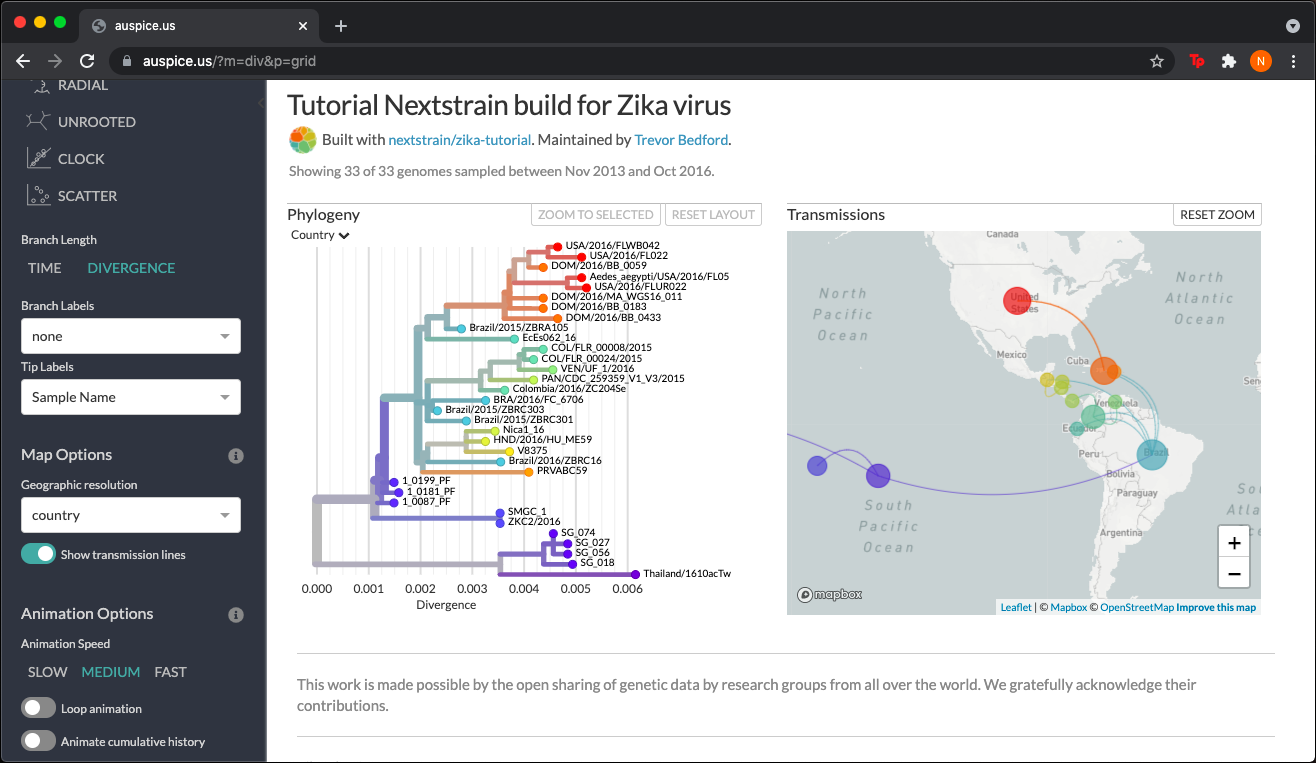